<a href="https://colab.research.google.com/github/sujin-create/finedu/blob/main/%EA%B8%88%EC%9C%B5%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%9D%B4%EC%9A%A9_%ED%85%8D%EC%8A%A4%ED%8A%B8_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#형태소 분석기 Mecab 설치

한국어 텍스트 처리에서 문자열을 단어 단위로 나눠주는 토크나이저인 형태소 분석기를 설치합니다.

In [ ]:
# Colab에 Mecab 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 1.11 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.1 MB/s 
     |████████████████████████████████| 453 kB 62.9 MB/s 
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-07-23 04:58:41--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::3403:4be7, 2406:da00:ff00::22e9:9f55, ...
Connecting to bitbucket.org (bi

#데이터 로드

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1FVNfqOb9sbuU6xLvAC_N5TrviBbAGm_I' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1FVNfqOb9sbuU6xLvAC_N5TrviBbAGm_I" -O finance_data.csv && rm -rf /tmp/cookies.txt

--2022-07-23 05:02:39--  https://docs.google.com/uc?export=download&confirm=t&id=1FVNfqOb9sbuU6xLvAC_N5TrviBbAGm_I
Resolving docs.google.com (docs.google.com)... 172.217.194.100, 172.217.194.102, 172.217.194.139, ...
Connecting to docs.google.com (docs.google.com)|172.217.194.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-7k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gc0arq3ev78oni9lb9d0e1b2a965ieif/1658552550000/17609157229046208934/*/1FVNfqOb9sbuU6xLvAC_N5TrviBbAGm_I?e=download&uuid=697261aa-8900-490c-925c-243b8b1d0799 [following]
--2022-07-23 05:02:41--  https://doc-0c-7k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gc0arq3ev78oni9lb9d0e1b2a965ieif/1658552550000/17609157229046208934/*/1FVNfqOb9sbuU6xLvAC_N5TrviBbAGm_I?e=download&uuid=697261aa-8900-490c-925c-243b8b1d0799
Resolving doc-0c-7k-docs.googleusercontent.com (doc-0c-7k-docs.googleusercontent.com)... 142.251.12.1

위의 링크로부터 전체 데이터에 해당하는 finance_data.csv를 다운로드합니다.



In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# df = pd.read_csv('finance_data.csv') 를 실행했는데 에러가 나면 df = pd.read_csv('/content/finance_data.csv')를 실행
# df = pd.read_csv('/content/finance_data.csv')를 실행했는데 에러가 나면 df = pd.read_csv('finance_data.csv')를 실행
df = pd.read_csv('finance_data.csv')

In [ ]:
df

,id,year_month,text,smishing
0,0,2017-01,XXX은행성산XXX팀장입니다.행복한주말되세요,0
1,1,2017-01,오늘도많이웃으시는하루시작하세요XXX은행 진월동VIP라운지 XXX올림,0
2,2,2017-01,안녕하십니까 고객님. XXX은행입니다.금일 납부하셔야 할 금액은 153600원 입니...,0
3,4,2017-01,XXX 고객님안녕하세요XXX은행 XXX지점입니다지난 한 해 동안 저희 XXX지점에 ...,0
4,5,2017-01,1월은 새로움이 가득XXX입니다.올 한해 더 많이행복한 한해되시길바랍니다,0
...,...,...,...,...
295940,336373,2018-12,XXX 고객님!열심히 달려왔던 2018년도 어느 새 뒤안길로 지나쳐가고 벅찬 설렘으...,0
295941,336375,2018-12,XXX고객님실버웰빙신탁이 만기도래 예정입니다.XXX남양주지점,0
295942,336376,2018-12,한해동안 XXX은행과 함께 해주셔서 정말 감사드립니다 2019년 기해년을 맞이하며 ...,0
295943,336377,2018-12,1228(금)예금및 적금 만기입니다.예금은 시간내서 내점하시고 적금은 1년 자동연장...,0


In [ ]:
print('전체 리뷰 개수 :',len(df)) # 테스트용 리뷰 개수 출력

전체 리뷰 개수 : 295945


In [ ]:
df.nunique()

id            295945
year_month        24
text          295944
smishing           2
dtype: int64

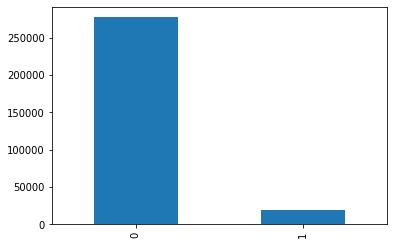

In [ ]:
df['smishing'].value_counts().plot(kind = 'bar')

In [ ]:
print(df.groupby('smishing').size().reset_index(name = 'count'))

   smishing   count
0         0  277242
1         1   18703


In [ ]:
print(df.isnull().values.any())

False


In [ ]:
print(df.isnull().sum())

id            0
year_month    0
text          0
smishing      0
dtype: int64


훈련 데이터와 테스트 데이터를 3:1 비율로 분리합니다.



In [ ]:
train_data, test_data = train_test_split(df, test_size = 0.25, random_state = 42, stratify=df['smishing'])
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 221958
테스트용 리뷰의 개수 : 73987


In [ ]:
print('--------훈련 데이터의 비율-----------')
print(f'정상 거래 비율 = {round(train_data.smishing.value_counts()[0]/len(train_data) * 100,3)}%')
print(f'사기 탐지 = {round(train_data.smishing.value_counts()[1]/len(train_data) * 100,3)}%')

--------훈련 데이터의 비율-----------
정상 거래 비율 = 93.68%
사기 탐지 = 6.32%


In [ ]:
print('--------테스트 데이터의 비율-----------')
print(f'정상 거래 비율 = {round(test_data.smishing.value_counts()[0]/len(test_data) * 100,3)}%')
print(f'사기 탐지 = {round(test_data.smishing.value_counts()[1]/len(test_data) * 100,3)}%')

--------테스트 데이터의 비율-----------
정상 거래 비율 = 93.68%
사기 탐지 = 6.32%


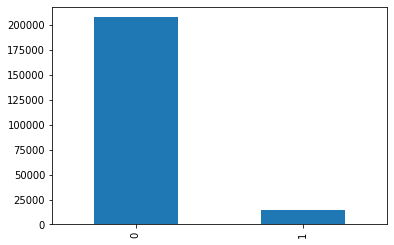

In [ ]:
train_data['smishing'].value_counts().plot(kind = 'bar')

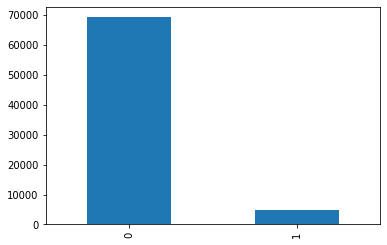

In [ ]:
test_data['smishing'].value_counts().plot(kind = 'bar')

In [ ]:
train_data[:5]

,id,year_month,text,smishing
263528,299038,2018-09,XXX은행 XXX골든라이프 행복건강 서비스 이벤트 당첨을 축하드립니다!XXX 고객님...,0
286796,326177,2018-11,XXX 고객님겸손은 사람을 머물게 하고칭찬은 사람을 가깝게 하고넓음은 사람을 따르게...,0
205400,233693,2018-03,XXX 고객님소중한 시간내주셔서 감사드립니다. 처리하신 업무 중 문의사항 있으시면...,0
112238,130435,2017-06,XXX쌍문역 XXX올림기분좋은 금요일한 주의 마지막 길목에서 멋지게마무리하세요,0
101125,117829,2017-06,매우동의한다라고 칭찬해주시기 바랍니다.XXX은행 노량진지점.,0


In [ ]:
train_data['text'] = train_data['text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data['text'].replace('', np.nan, inplace=True)
train_data = train_data.dropna(how='any') # Null 값 제거
print(train_data.isnull().sum())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


id            0
year_month    0
text          0
smishing      0
dtype: int64


In [ ]:
train_data[:5]

,id,year_month,text,smishing
263528,299038,2018-09,은행 골든라이프 행복건강 서비스 이벤트 당첨을 축하드립니다 고객님 행복건강 앱 고객...,0
286796,326177,2018-11,고객님겸손은 사람을 머물게 하고칭찬은 사람을 가깝게 하고넓음은 사람을 따르게 하고...,0
205400,233693,2018-03,고객님소중한 시간내주셔서 감사드립니다 처리하신 업무 중 문의사항 있으시면 언제든...,0
112238,130435,2017-06,쌍문역 올림기분좋은 금요일한 주의 마지막 길목에서 멋지게마무리하세요,0
101125,117829,2017-06,매우동의한다라고 칭찬해주시기 바랍니다은행 노량진지점,0


In [ ]:
test_data['text'] = test_data['text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['text'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


전처리 후 테스트용 샘플의 개수 : 73986


In [ ]:
test_data[:5]

,id,year_month,text,smishing
162519,186316,2017-10,고객님 찌뿌둥한 목요일 기지개 활짝펴고 으싸으싸 ㅂ 오늘도 힘내세요 화이팅은행주안역올림,0
187957,214717,2017-12,일년중 가장 특별한날생신을 축하드립니다행복한하루 되세요원주 대리,0
219460,249420,2018-04,소중한 은행거래 감사합니다활기찬 하루 보내세요은행,0
183672,210027,2017-11,고객님 정기예금 우대금리 행사안녕하십니까정기예금 월말까지한시적으로 우대금리 지입...,0
80852,94402,2017-05,늘거래감사합니다힘나는한주시작하세요철산역매정드림,0


# 형태소 분석기로 각 단어들 나누기

파이썬 입장에서는 문자열이 들어오면 어디까지가 단어인지 알 수가 없습니다. 그래서 우리는 파이썬에게 각 단어들의 단위를 알려줄 필요가 있습니다.  

이를 위해서 한국어에서는 형태소 분석기라는 것을 사용합니다. 형태소 분석기는 다양한 종류가 있지만, 이번 실습에서는 Mecab을 사용합니다.

In [ ]:
from konlpy.tag import Mecab

In [ ]:
mecab = Mecab()
print(mecab.morphs('와 이런 것도 상품이라고 차라리 내가 만드는 게 나을 뻔'))

['와', '이런', '것', '도', '상품', '이', '라고', '차라리', '내', '가', '만드', '는', '게', '나을', '뻔']


In [ ]:
train_data['text']

263528    은행 골든라이프 행복건강 서비스 이벤트 당첨을 축하드립니다 고객님 행복건강 앱 고객...
286796     고객님겸손은 사람을 머물게 하고칭찬은 사람을 가깝게 하고넓음은 사람을 따르게 하고...
205400     고객님소중한 시간내주셔서 감사드립니다 처리하신 업무 중  문의사항 있으시면 언제든...
112238                쌍문역 올림기분좋은 금요일한 주의 마지막 길목에서 멋지게마무리하세요
101125                         매우동의한다라고 칭찬해주시기 바랍니다은행 노량진지점
                                ...                        
27491                     김포대곶지점 입니다전담직원이 되어 인사드립니다좋은 하루되세요
130897                                      님 정기예금만기경과되었습니다
118990     고객님 안녕하세요이번 한 주는  행복하게 보내셨나요벌써 한 주의 마무리 금요일이네...
200077    가는 겨울이 아쉬운지밤사이 몰래 찾아온예쁜 겨울 꽃들이아침에 눈을 황홀하게 만드네요...
49982      고객님봄꽃을 보니                      시인김시천봄꽃을 보니그리운...
Name: text, Length: 221956, dtype: object

In [ ]:
train_data['tokenized'] = train_data['text'].apply(mecab.morphs)

In [ ]:
test_data['tokenized'] = test_data['text'].apply(mecab.morphs)

In [ ]:
train_data['tokenized']

263528    [은행, 골든, 라이프, 행복, 건강, 서비스, 이벤트, 당첨, 을, 축, 하, 드...
286796    [고객, 님, 겸손, 은, 사람, 을, 머물, 게, 하, 고, 칭찬, 은, 사람, ...
205400    [고객, 님, 소중, 한, 시간, 내주, 셔서, 감사, 드립니다, 처리, 하, 신,...
112238    [쌍문역, 올림, 기분, 좋, 은, 금요일, 한, 주, 의, 마지막, 길목, 에서,...
101125    [매우, 동의, 한다, 라고, 칭찬, 해, 주, 시, 기, 바랍니다, 은행, 노량진...
                                ...                        
27491     [김포, 대곶, 지점, 입니다, 전담, 직원, 이, 되, 어, 인사, 드립니다, 좋...
130897                         [님, 정기예금, 만기, 경과, 되, 었, 습니다]
118990    [고객, 님, 안녕, 하, 세요, 이, 번, 한, 주, 는, 행복, 하, 게, 보내...
200077    [가, 는, 겨울, 이, 아쉬운지, 밤사이, 몰래, 찾아온, 예쁜, 겨울, 꽃, 들...
49982     [고객, 님, 봄꽃, 을, 보, 니, 시인, 김시천, 봄꽃, 을, 보, 니, 그리운...
Name: tokenized, Length: 221956, dtype: object

In [ ]:
test_data['tokenized']

162519    [고객, 님, 찌뿌둥, 한, 목요일, 기지개, 활짝, 펴, 고, 으싸, 으싸, ㅂ,...
187957    [일, 년, 중, 가장, 특별, 한, 날, 생신, 을, 축하, 드립니다, 행복, 한...
219460        [소중, 한, 은행, 거래, 감사, 합니다, 활기찬, 하루, 보내, 세요, 은행]
183672    [고객, 님, 정기예금, 우대금리, 행사, 안녕, 하, 십니까, 정기예금, 월말, ...
80852     [늘, 거래, 감사, 합니다, 힘, 나, 는, 한, 주, 시작, 하, 세요, 철산역...
                                ...                        
264394    [광고, 혜택, 드리, 는, 대출, 상품, 정보, 고객, 님, 안녕, 하, 세요, ...
265834    [고객, 님, 상쾌, 한, 가을, 아침, 입니다, 바쁘, 신, 와중, 에, 저희, ...
271910    [내, 아이, 연금, 펀드, 가입, 고객, 에, 대한, 자녀, 인적, 성, 검사, ...
72931     [당일, 거래, 감사, 드립니다, 행복, 한, 주말, 되, 세요, 신림, 서, 계장...
32251     [고객, 님, 항상, 저희, 은행, 신갈, 을, 이용, 해, 주, 심, 에, 감사,...
Name: tokenized, Length: 73986, dtype: object

In [ ]:
# 훈련 데이터
X_train = train_data['tokenized'].values
y_train = train_data['smishing'].values

#테스트 데이터
X_test= test_data['tokenized'].values
y_test = test_data['smishing'].values

# 딥 러닝 전처리 Step 1. Tokenizer로부터 단어 집합 정의
* 이 과정에서 각 단어들에게 고유한 정수들을 부여한다.

texts_to_sequences: 문장을 숫자로 치환 합니다. 훈련 데이터와 테스트 데이터에 대해서 각각 적용해주어야 합니다.

딥 러닝을 위한 전처리 도구인 텐서플로의 Tokenizer와 pad_sequences를 사용해보자.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
for key, value in tokenizer.word_index.items():
    print('{}  \t======>\t {}'.format(key, value))
    if value == 25:
        break

하  	======>	 1
이  	======>	 2
을  	======>	 3
는  	======>	 4
시  	======>	 5
한  	======>	 6
은행  	======>	 7
고객  	======>	 8
에  	======>	 9
은  	======>	 10
고  	======>	 11
의  	======>	 12
님  	======>	 13
주  	======>	 14
세요  	======>	 15
습니다  	======>	 16
되  	======>	 17
를  	======>	 18
올림  	======>	 19
으로  	======>	 20
있  	======>	 21
해  	======>	 22
합니다  	======>	 23
도  	======>	 24
감사  	======>	 25


'감사'라는 단어는 현재 몇 번 정수로 맵핑이 되었는지 확인해봅시다.  
이는 tokenizer.word_index에 단어를 입력하여 얻을 수 있습니다.

In [ ]:
tokenizer.word_index['감사']

25

'감사'라는 단어는 25번 단어와 맵핑되었습니다.

반대로 25번 숫자로부터 단어를 얻어봅시다. 이는 tokenzier.index_word[]로 부터 얻을 수 있습니다.

In [ ]:
tokenizer.index_word[25]

'감사'

현재 훈련 데이터에는 단어가 몇 개 있었는지를 알고 싶다면 tokenizer.word_index에 원소가 몇 개 들어있는지 len() 함수를 통해서 확인해보면 됩니다.

In [ ]:
len(tokenizer.word_index)

35594

# 딥 러닝 전처리 Step 2. 각 단어들을 맵핑된 정수로 변환

* 위에서 정의한 단어와 정수간의 맵핑 관계에 따라서 각 단어들을 정수로 변환한다.

앞서 각 단어는 고유한 정수와 맵핑되어져 있음을 확인했습니다.  
딥 러닝은 텍스트를 텍스트인 상태로 처리하지 않습니다.  
딥 러닝은 숫자만을 처리하므로 텍스트를 각 맵핑되는 정수로 변환을 해줍니다.  

이는 tokenizer의 tests_to_sequences()를 통해서 가능합니다.  

이후 테스트 데이터에 대해서 정확도를 측정할 것이므로 훈련 데이터 뿐만 아니라 테스트 데이터에 대해서도 미리 해둡니다.

In [ ]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

**변환된 Sequences 확인**

이제 첫번째 샘플에 대해서 출력을 해봅시다. 각 단어가 고유한 정수로 잘 변환되었나요?

In [ ]:
print(X_train[0])

[7, 939, 803, 31, 96, 101, 426, 1031, 3, 1223, 1, 27, 8, 13, 31, 96, 323, 8, 25, 426, 299, 104, 96, 43, 9, 2049, 22, 14, 45, 693, 25, 27, 25, 1, 4, 134, 3, 8, 13, 140, 838, 3, 1589, 22, 27, 838, 4365, 4583, 1952, 2302, 4559, 1476, 6425, 3535, 2470, 36, 50, 2960, 1237, 404, 3511, 7, 2724, 32, 404, 51, 5, 90, 46, 2069, 543, 916, 534, 6, 447, 4, 7, 627, 384, 1761, 18, 81, 1, 5, 52, 60, 244, 20, 24, 7, 10, 8, 13, 140, 211, 12, 34, 40, 101, 18, 406, 1, 35, 16, 25, 23]


앞서 index_word를 사용하면 각 정수로부터 단어를 얻을 수 있음을 확인했습니다.  
이를 이용하여 첫번째 샘플에 대해서 원래 텍스트일 때는 어떤 텍스트였는지 원복 작업도 해봅시다.

In [ ]:
print(' '.join([tokenizer.index_word[index] for index in X_train[0]]))

은행 골든 라이프 행복 건강 서비스 이벤트 당첨 을 축 하 드립니다 고객 님 행복 건강 앱 고객 감사 이벤트 신규 가입 건강 상담 에 참여 해 주 셔서 대단히 감사 드립니다 감사 하 는 마음 을 고객 님 께 사은품 을 증정 해 드립니다 사은품 녹십자 웰빙 프로 바이오 틱 스 멀티 비타민 세트 만 원 상당 경품 수령 처 은행 천안 지점 수령 일 시 년 월 일월 이후 기타 자세 한 문의 는 은행 스마트 상 담부 를 이용 하 시 기 바랍니다 앞 으로 도 은행 은 고객 님 께 최고 의 상품 과 서비스 를 제공 하 겠 습니다 감사 합니다


테스트 데이터의 첫번째 샘플에 대해서도 출력해보고, 원복 작업도 해봅시다.

In [ ]:
print(X_test[0])

[8, 13, 1700, 6, 1047, 1567, 568, 1309, 11, 1196, 1196, 1787, 70, 24, 976, 15, 734, 7, 2609, 19]


In [ ]:
print(' '.join([tokenizer.index_word[index] for index in X_test[0]]))

고객 님 찌뿌둥 한 목요일 기지개 활짝 펴 고 으싸 으싸 ㅂ 오늘 도 힘내 세요 화이팅 은행 주안역 올림


# 딥 러닝 전처리 Step 3. 시퀀스의 길이를 맞춰주기

딥 러닝은 기본적으로 '병렬 연산'을 합니다. 예를 들어서 텍스트 데이터가 25만개가 있다고 했을 때, 딥 러닝은 25만개를 1개씩 처리하는 것이 아니라 일부 뭉탱이로 가져가서 처리합니다.  

이를 배치 크기 라고 합니다. 만약, 제가 배치 크기를 64로 정했다면, 딥 러닝은 25만 개의 데이터를 64개씩 꺼내서 64개씩 처리합니다. 그런데 이렇게 병렬 연산을 하기 위해서는 문장의 길이가 달라서는 안 됩니다.  

문장의 길이가 같아야만 병렬 연산이 가능합니다. 그래서 모든 문장에 대해서 길이를 맞춰줍니다.

3가지 옵션을 입력해 줍니다.

maxlen: 최대 문장 길이를 정의합니다. 최대 문장길이보다 길면, 잘라냅니다.
truncating: 문장의 길이가 maxlen보다 길 때 앞을 자를지 뒤를 자를지 정의합니다.
padding: 문장의 길이가 maxlen보다 짧을 때 채워줄 값을 앞을 채울지, 뒤를 채울지 정의합니다.

리뷰의 최대 길이 : 664
리뷰의 평균 길이 : 69.14370866297824


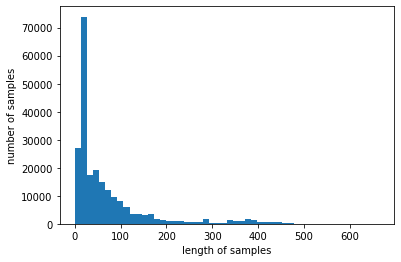

In [ ]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
# 한 문장의 최대 단어 숫자
max_length = 120

In [ ]:
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

In [ ]:
# 모든 문장의 길이를 120으로 맞춥니다.
X_train.shape

(221956, 120)

In [ ]:
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    7,  939,  803,   31,   96,  101,  426, 1031,
          3, 1223,    1,   27,    8,   13,   31,   96,  323,    8,   25,
        426,  299,  104,   96,   43,    9, 2049,   22,   14,   45,  693,
         25,   27,   25,    1,    4,  134,    3,    8,   13,  140,  838,
          3, 1589,   22,   27,  838, 4365, 4583, 1952, 2302, 4559, 1476,
       6425, 3535, 2470,   36,   50, 2960, 1237,  404, 3511,    7, 2724,
         32,  404,   51,    5,   90,   46, 2069,  543,  916,  534,    6,
        447,    4,    7,  627,  384, 1761,   18,   81,    1,    5,   52,
         60,  244,   20,   24,    7,   10,    8,   13,  140,  211,   12,
         34,   40,  101,   18,  406,    1,   35,   16,   25,   23],
      dtype=int32)

# 딥 러닝 모델 만들기

1. **import**: 필요한 모듈 import
2. **전처리**: 학습에 필요한 데이터 전처리를 수행합니다.
3. **모델링(model)**: 모델을 정의합니다.
4. **컴파일(compile)**: 모델을 생성합니다.
5. **학습 (fit)**: 모델을 학습시킵니다.

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
len(tokenizer.word_index)

35594

**Embedding은 각 단어를 랜덤 초기화 된 값을 가지는 벡터로 바꿔주는 역할을 합니다. 이 값들은 일종의 Weight(가중치)이므로 학습 과정에서 loss를 줄이는 방향으로 학습됩니다.**

Embedding에는 사용할 단어의 수를 작성해주어야 합니다.  

Embedding(사용할 단어의 수, 각 단어를 몇 차원의 벡터로 바꿀 것인지)  

주의할 점은 사용할 단어의 수에 +1을 해주어야 합니다.  
그 이유는 우리가 앞서 padding을 하면서 숫자 0도 사용하기로 했기 때문입니다.

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

아래 코드는 Embedding()을 통해서 각 단어가 100차원의 랜덤 초기화 값을 가지는 벡터로 바뀐 후에, LSTM이 문장을 읽는 코드입니다.  

예를 들어 '나는 좋은 학생입니다' 라는 문장이 있었다면 토크나이저를 통해서  
[3, 12, 37, 28]로 숫자로 변환되었다고 해봅시다.  

이제 3번 단어는 랜덤 초기화 된 벡터값  
12번 단어는 랜덤 초기화 된 12번 벡터값  
37번 단어는 랜덤 초기화 된 37번 벡터값  
27번 단어는 랜덤 초기화 된 28번 벡터값을 가지게 되고  

LSTM은 네 번 펼쳐지면서 벡터값 4개를 순차적으로 입력받은 후에  
이 문장이 스팸인지 아닌지를 판단하게 됩니다.

3번 단어는 -> [0.7, 0.5, 0.2]로 랜덤 초기화  
7번 단어는 -> [0.2, 0.9, 0.1]로 랜덤 초기화

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
2959/2960 [============================>.] - ETA: 0s - loss: 0.0084 - acc: 0.9979
Epoch 1: val_acc improved from -inf to 0.99982, saving model to best_model.h5
2960/2960 [==============================] - 44s 12ms/step - loss: 0.0084 - acc: 0.9979 - val_loss: 0.0011 - val_acc: 0.9998
Epoch 2/15
2956/2960 [============================>.] - ETA: 0s - loss: 0.0017 - acc: 0.9997
Epoch 2: val_acc did not improve from 0.99982
2960/2960 [==============================] - 34s 12ms/step - loss: 0.0017 - acc: 0.9997 - val_loss: 0.0015 - val_acc: 0.9997
Epoch 3/15
2959/2960 [============================>.] - ETA: 0s - loss: 0.0014 - acc: 0.9998
Epoch 3: val_acc did not improve from 0.99982
2960/2960 [==============================] - 35s 12ms/step - loss: 0.0014 - acc: 0.9998 - val_loss: 0.0014 - val_acc: 0.9998
Epoch 4/15
2958/2960 [============================>.] - ETA: 0s - loss: 0.0012 - acc: 0.9998
Epoch 4: val_acc improved from 0.99982 to 0.99984, saving model to best_model.h5
29

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

2313/2313 [==============================] - 11s 5ms/step - loss: 0.0017 - acc: 0.9998

 테스트 정확도: 0.9998
